# Parameter distribution for each parameter

In [38]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from IPython.core.display import HTML

%matplotlib notebook

In [39]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [41]:
label = np.array(range(23), dtype=object)

label[0] = "$\u03C4_{e}$"
label[1] = "$\u03C4_{i}$"
label[2] = "$\gamma_{e}$"
label[3] = "$\gamma_{i}$"
label[4] = "$\Gamma_{e}$"
label[5] = "$\Gamma_{i}$"
label[6] = "$N_{ee}$"
label[7] = "$N_{ei}$"
label[8] = "$N_{ie}$"
label[9] = "$N_{ii}$"
label[10] = "$p_{ee}$"
label[11] = "$p_{ei}$"
label[12] = "$h_{e}^{rest}$"
label[13] = "$h_{i}^{rest}$"
label[14] = "$h_{e}^{eq}$"
label[15] = "$h_{i}^{eq}$"
label[16] = "$S_{e}^{max}$"
label[17] = "$S_{i}^{max}$"
label[18] = "$\mu_{e}$"
label[19] = "$\mu_{i}$"
label[20] = "$\sigma_{e}$"
label[21] = "$\sigma_{i}$"
label[22] = "$\eta$"

In [42]:
data = scipy.io.loadmat('regularized_normalized_paramsets.mat')  
normalized_paramsets = data["normalized_paramsets"]
num_samples = np.size(normalized_paramsets,2)

In [43]:
data = scipy.io.loadmat('Datasets\82_subject_indices.mat')  
indx_a = data["indx_a"]
indx_a = indx_a[0,:]

In [44]:
data = scipy.io.loadmat('spectra_JSDs.mat')  
JSDs = data["JSDs"]
JSDs = JSDs[:,0]

<IPython.core.display.Javascript object>


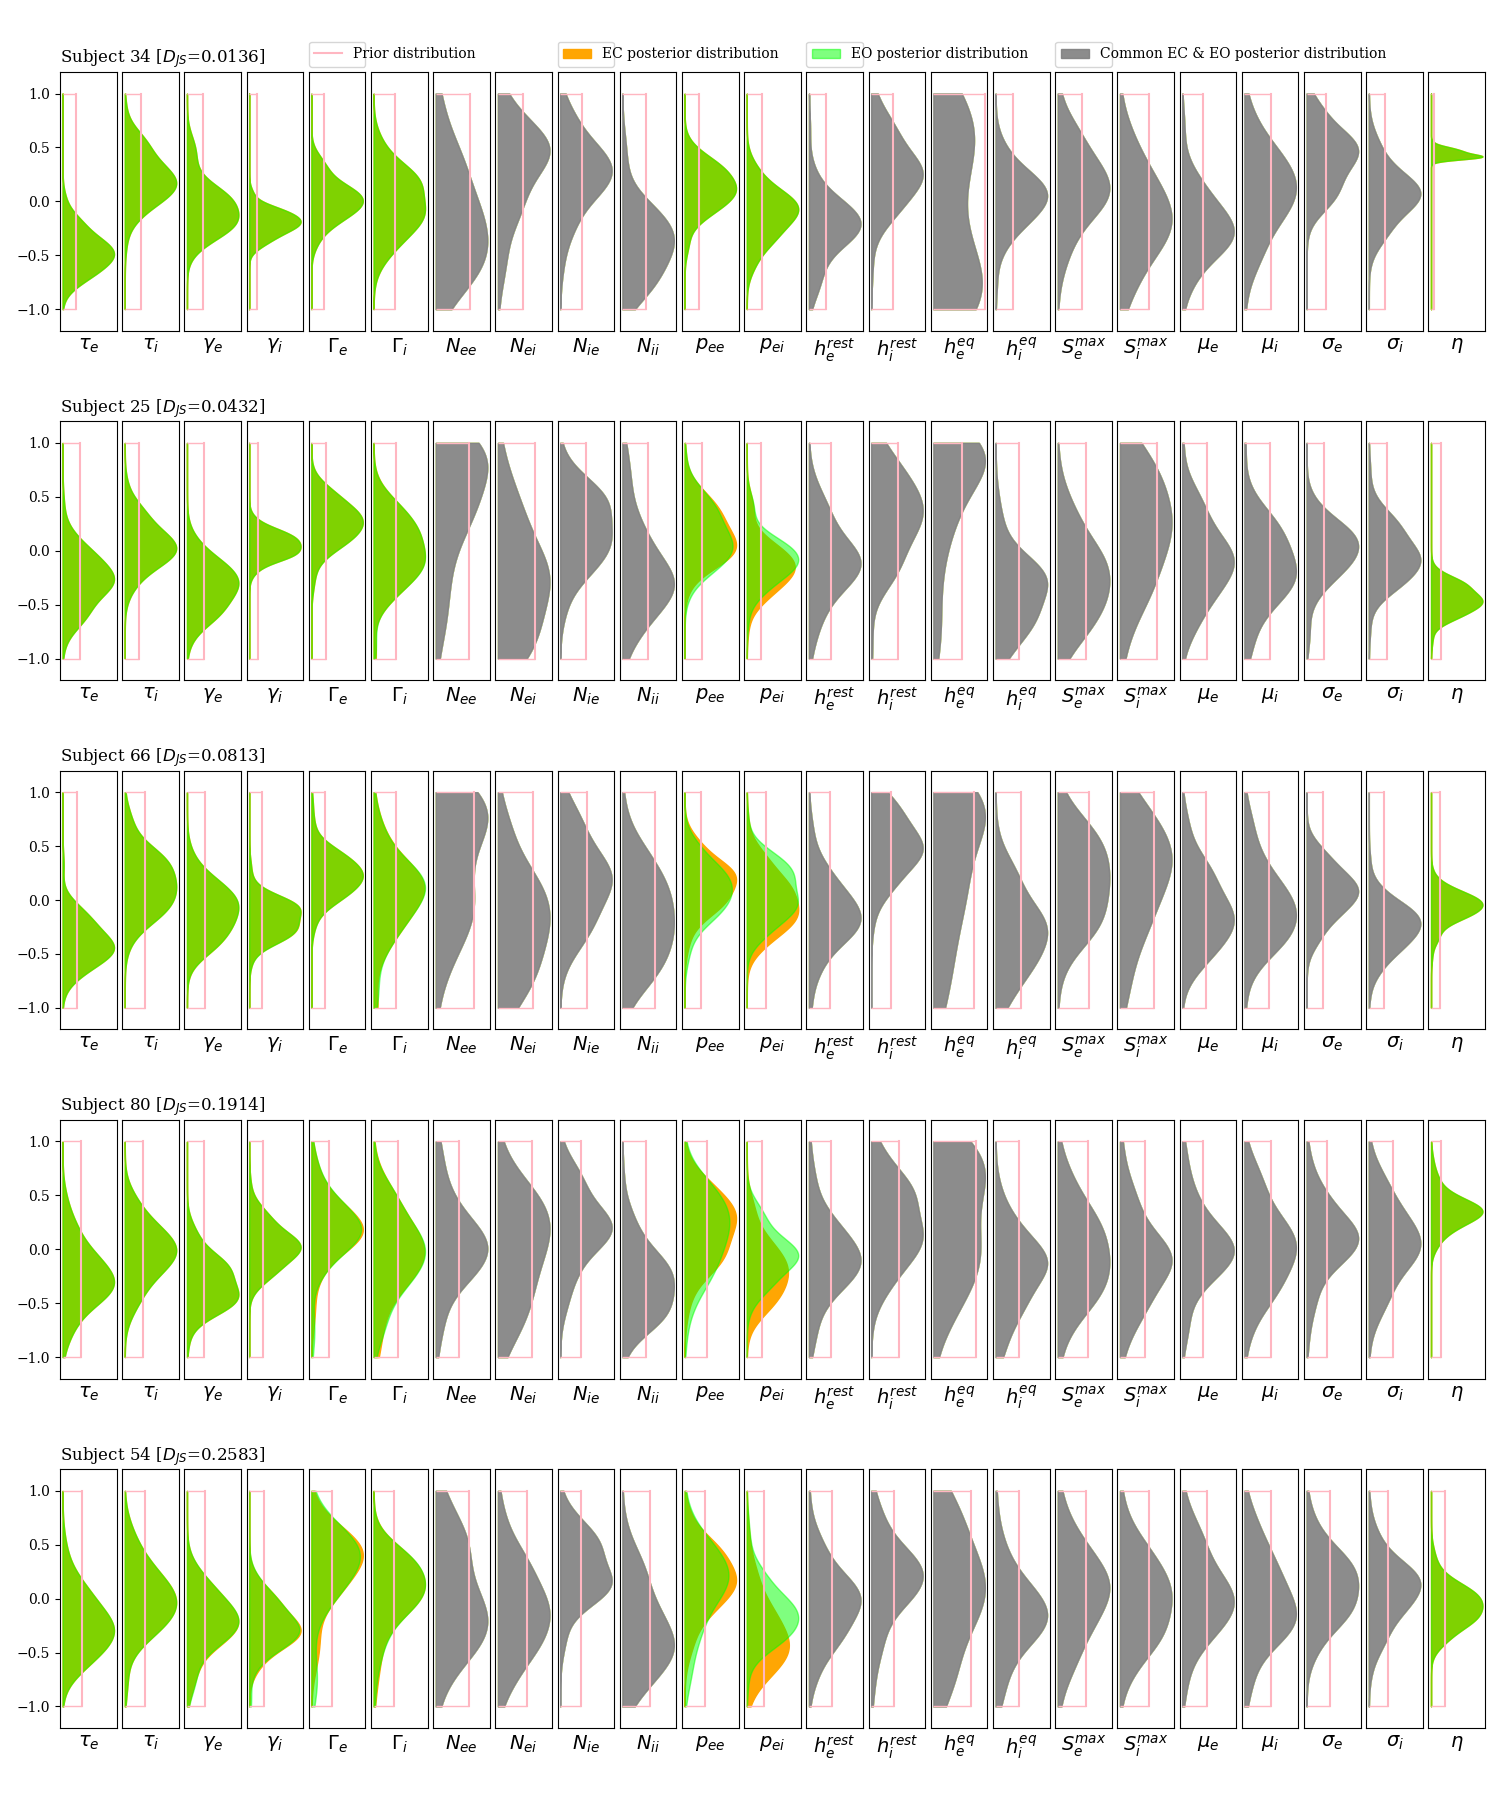

In [45]:
fig = plt.figure("Paramset distributions 2", figsize=(15, 18))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


gs = plt.GridSpec(5, 23)
gs.update(wspace=0.1, hspace=0.35)

norm_param_std = np.zeros([5,23])

count = 0

for i in (27,    20,    49,    59,    39):
    
    EC_normalized_paramsets = normalized_paramsets[i-1,:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
    EO_normalized_paramsets = normalized_paramsets[i-1,:, [23,24,25,26,27,28, 6,7,8,9, 29,30, 12,13,14,15,16,17,18,19,20,21,31]]
    
    
    for k in range(23):

        y_d = np.linspace(-1, 1, 1000)
        y_prior = np.linspace(-1, 1, 1000)
        
        ax = fig.add_subplot(gs[count,k])
        fig.subplots_adjust(left=0.04,right=0.99,bottom=0.04,top=0.96, wspace=0.1, hspace=0.1)
        
        if count==0 and k==4:
            plt.plot(0.5*np.ones(1000), y_prior, 'lightpink', alpha=1, label='Prior distribution')
        else:
            plt.plot(0.5*np.ones(1000), y_prior, 'lightpink', alpha=1)
        
        
        y = EC_normalized_paramsets[k,:]
        std = np.std(y)
    
        """Silverman's rule of thumb to compute the optimal choice of bandwidth"""
        optimal_bandwidth = 1.06*std*num_samples**-0.2
    

        """instantiate and fit the KDE model"""
        kde = KernelDensity(bandwidth=optimal_bandwidth, kernel='gaussian')
        kde.fit(y[:, None])

        """score_samples returns the log of the probability density"""
        logprob = kde.score_samples(y_d[:, None])
        distri = np.exp(logprob)
        max_distri = np.max(distri)

        if count==0 and k==8:
            plt.fill_betweenx(y_d, np.exp(logprob),  alpha=0.99, color='orange', label='EC posterior distribution')
            
        else:
            plt.fill_betweenx(y_d, np.exp(logprob),  alpha=0.99, color='orange')
            
        
        y = EO_normalized_paramsets[k,:]
        std = np.std(y)
    
        """Silverman's rule of thumb to compute the optimal choice of bandwidth"""
        optimal_bandwidth = 1.06*std*num_samples**-0.2
    

        """instantiate and fit the KDE model"""
        kde = KernelDensity(bandwidth=optimal_bandwidth, kernel='gaussian')
        kde.fit(y[:, None])

        """score_samples returns the log of the probability density"""
        logprob = kde.score_samples(y_d[:, None])
        distri = np.exp(logprob)
        max_distri = np.max(distri)

        
        if count==0 and k==12:
            plt.fill_betweenx(y_d, np.exp(logprob),  color='lime', alpha=0.5, label='EO posterior distribution')
        else:
            plt.fill_betweenx(y_d, np.exp(logprob),  color='lime', alpha=0.5)
            
        
        if k in [6,7,8,9,12,13,14,15,16,17,18,19,20,21]:
            plt.fill_betweenx(y_d, np.exp(logprob),  color='white', alpha=1)
            
            if count==0 and k==16:
                plt.fill_betweenx(y_d, np.exp(logprob),  color='gray', alpha=0.9, label='Common EC & EO posterior distribution')
            else:
                plt.fill_betweenx(y_d, np.exp(logprob),  color='gray', alpha=0.9)
            
        
        ax.hlines(y=-1, xmin=0, xmax=0.5, linewidth=1, color='lightpink')
        ax.hlines(y=1, xmin=0, xmax=0.5, linewidth=1, color='lightpink')
        
        plt.ylim([-1.2,1.2])
    
        plt.xticks([])
        plt.grid(False)
        
        
        if k==0:
            plt.title('Subject %d [$D_{JS}$=%5.4f]' %(indx_a[i-1],JSDs[i-1]), loc='left')
        else:
            plt.yticks([])
        
        
        plt.xlabel('%s' % (label[k]), fontsize=14)
        
        if count==0 and (k==4 or k==8 or k==12 or k==16):
            plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
        
    
    count = count + 1
    
plt.show()